# RQ4: Ensemble Model Analysis

In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance

pd.options.display.float_format = '{:,.3f}'.format

In [303]:
ensembles = ["pixelattack_spatialtransformation_autoattack", "pixelattack_spatialtransformation_bim", "pixelattack_spatialtransformation_deepfool"]
# ensembles = ["pixelattack_spatialtransformation_autoattack", "pixelattack_spatialtransformation_bim"]
attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack", "spatialtransformation"]

In [304]:
def load_data(train, test, fname) :
    if train in attacks :
        base_dir = "../trained_models/BagOfTricks/1000val/full/"
        fpath = base_dir + "{}/eval/best/{}/{}.txt".format(train, test, fname)
    else :
        base_dir = "../ensemble_models/"
        fpath = base_dir + "{}/eval/{}/{}.txt".format(train, test, fname)

    return np.loadtxt(fpath).astype(np.int)

train = "pixelattack_spatialtransformation_autoattack"
# train = "pgd"
test = "pgd"

y_adv = load_data(train, test, "Y_adv")
y_adv_pred = load_data(train, test, "Y_adv_pred")

In [305]:
def get_robust_data(train, test):
    y_adv = load_data(train, test, "Y_adv")
    y_adv_pred = load_data(train, test, "Y_adv_pred")
    return y_adv, y_adv_pred

# train = "pgd"
# test = "autoattack"
y_adv, y_adv_pred = get_robust_data(train, test)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(pixelattack_spatialtransformation_autoattack,pgd): [3 8 8 ... 5 1 7]
Y_adv_pred(pixelattack_spatialtransformation_autoattack,pgd): [3 8 8 ... 5 1 7]


In [306]:
train = ensembles.copy()

test = attacks.copy()
# test.append("all")

In [307]:
def get_accuracies(train, test) :
    predictions = {}
    labels = {}

    for a1 in train :
        predictions[a1] = {}
        labels[a1] = {}
        
    for a1 in train :
        for a2 in test :
            y, y_pred = get_robust_data(a1, a2)
            predictions[a1][a2] = y_pred
            labels[a1][a2] = y

    accs = {}
    for tr in train :
        accs[tr] = {}
        for ts in test :
            accs[tr][ts] = (labels[tr][ts] == predictions[tr][ts]).sum().item() / len(labels[tr][ts])


    accs = pd.DataFrame(data=accs)
    accs_transpose = pd.DataFrame(data=accs).T
    return accs_transpose, accs 

accs_transpose, accs = get_accuracies(train, test)

In [308]:
accs

,pixelattack_spatialtransformation_autoattack,pixelattack_spatialtransformation_bim,pixelattack_spatialtransformation_deepfool
autoattack,0.713,0.715,0.710
autopgd,0.712,0.717,0.709
bim,0.709,0.710,0.704
cw,0.719,0.723,0.723
fgsm,0.691,0.693,0.696
pgd,0.710,0.712,0.704
deepfool,0.705,0.712,0.714
newtonfool,0.718,0.722,0.723
squareattack,0.716,0.719,0.713
pixelattack,0.644,0.644,0.644


In [309]:
accs["real_model"] = accs_transpose.mean()

In [310]:
accsT = accs.T

In [311]:
accsT["all"] = accs.mean()

In [312]:
accsT

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation,all
pixelattack_spatialtransformation_autoattack,0.713,0.712,0.709,0.719,0.691,0.710,0.705,0.718,0.716,0.644,0.738,0.707
pixelattack_spatialtransformation_bim,0.715,0.717,0.710,0.723,0.693,0.712,0.712,0.722,0.719,0.644,0.738,0.709
pixelattack_spatialtransformation_deepfool,0.710,0.709,0.704,0.723,0.696,0.704,0.714,0.723,0.713,0.644,0.738,0.707
real_model,0.713,0.712,0.708,0.722,0.693,0.709,0.710,0.721,0.716,0.644,0.738,0.708


In [313]:
# 3 classes
clusters = {'autopgd': ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool', 'squareattack'], 'pixelattack': ['pixelattack'], 'spatialtransformation': ['spatialtransformation']}

In [314]:
ori_accsT, ori_accs = get_accuracies(attacks, attacks)

In [315]:
ori_accsT["all"] = ori_accs.mean()

In [316]:
ori_accs = ori_accsT.T

In [317]:
def measure_best_performing_model(clusters):
    res = {}
    upper_bound = 0
    n = 0
    for centroid, members in clusters.items() :
        for m in members :
            res[m] = ori_accs[centroid][m]
    return res
    
bpm = measure_best_performing_model(clusters)
bpm["all"] = np.array(list(bpm.values())).mean()

In [318]:
bpm

{'autoattack': 0.7182,
 'autopgd': 0.7189,
 'bim': 0.7124,
 'cw': 0.7287,
 'fgsm': 0.6979,
 'pgd': 0.7128,
 'deepfool': 0.7112,
 'newtonfool': 0.7265,
 'squareattack': 0.7222,
 'pixelattack': 0.644,
 'spatialtransformation': 0.7383,
 'all': 0.7119181818181818}

In [319]:
accs = accsT.T

In [320]:
accs["best_performing_model"] = bpm.values()
centroids = clusters.keys()
for centroid in centroids :
    accs[centroid] = ori_accs[centroid]

accs = accs.drop(columns=ensembles)

In [321]:
accsT = accs.T

In [322]:
accsT

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation,all
real_model,0.713,0.712,0.708,0.722,0.693,0.709,0.710,0.721,0.716,0.644,0.738,0.708
best_performing_model,0.718,0.719,0.712,0.729,0.698,0.713,0.711,0.727,0.722,0.644,0.738,0.712
autopgd,0.718,0.719,0.712,0.729,0.698,0.713,0.711,0.727,0.722,0.143,0.365,0.632
pixelattack,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.644,0.100,0.149
spatialtransformation,0.441,0.444,0.436,0.480,0.446,0.441,0.442,0.480,0.499,0.098,0.738,0.450


In [323]:
def plot_heatmap(metrics, cmap, fpath, vmin, vmax, annot=True): 

    df = pd.DataFrame(data=metrics)

    plt.figure(figsize=(12,4))
    fig = sns.heatmap(df, cmap=cmap, vmin=vmin, vmax=vmax, annot=annot, fmt=".3f", linewidth=0.7)
#     fig.set(xlabel='Test', ylabel='Train', fontsize=18)
    plt.xlabel('Test', fontsize=16)
    plt.ylabel('Train', fontsize=16)
    fig.figure.savefig(fpath, bbox_inches='tight')
    plt.show()

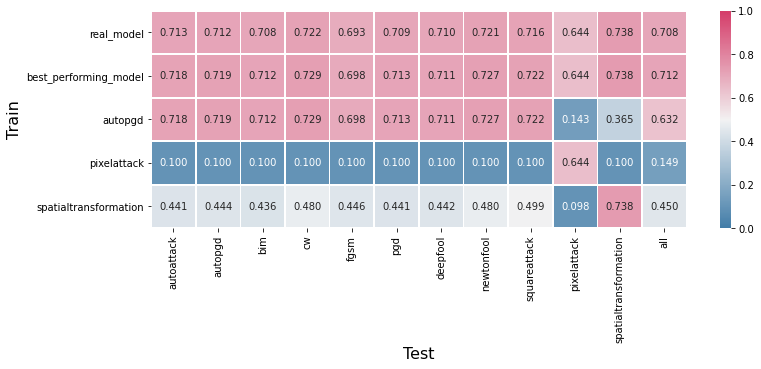

In [324]:
path = "plot/bot-ensemble-model.png"

# Generate a custom diverging colormap
cmap = sns.diverging_palette(h_neg=240, h_pos=0,s=75, l=50, n=1, as_cmap=True)
plot_heatmap(accsT, cmap, path, 0, 1)